In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import pickle

plt.rcParams["axes.xmargin"] = 0
plt.rcParams["toolbar"] = "None"
plt.rcParams["axes.titlesize"] = 8

from IPython.display import Audio
from utils import get_spectrogram


# import tensorflow as tf
from utils import get_spectrogram, plot_spectrogram

# import tensorflow_io as tfio

In [2]:
with open("GunSound_FCN.pkl","rb") as f:
        model = pickle.load(f)

model.pop()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1, 1, 256)      │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 1, 1, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 1, 1, 2)        │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 864,776 (3.30 MB)

 Trainable params: 288,258 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 576,518 (2.20 MB)

Max: -7.548518657684326
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


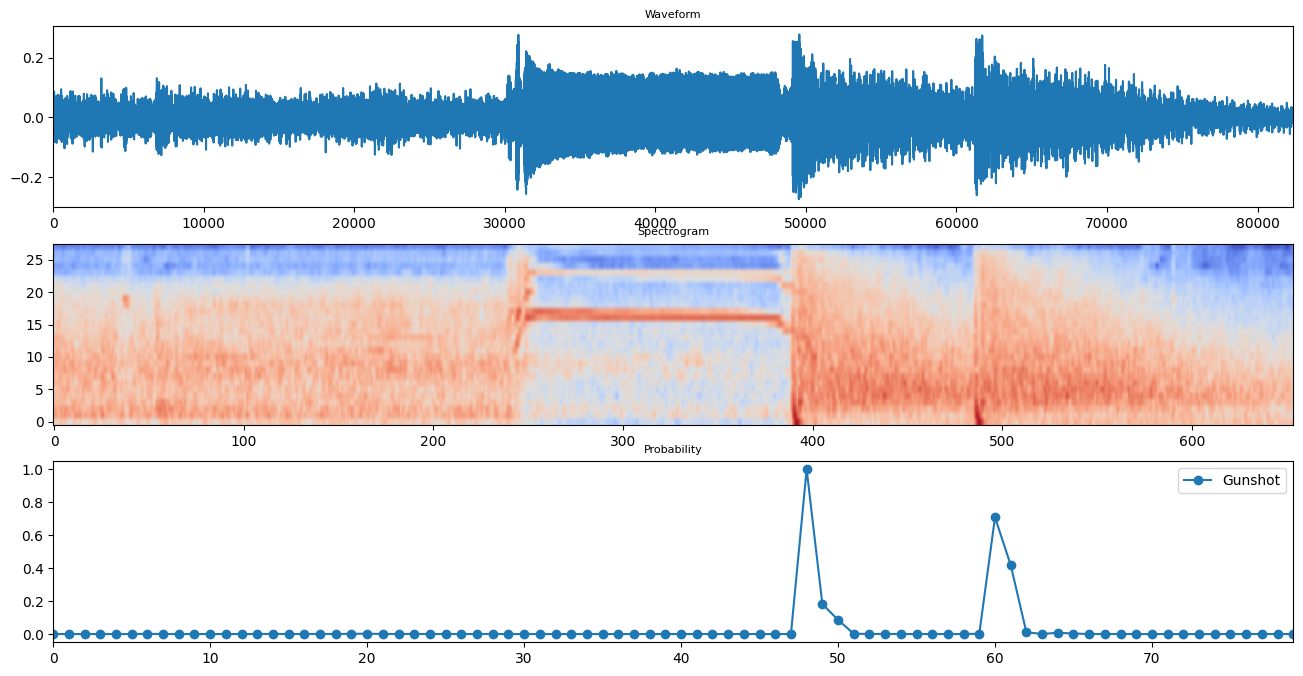

WAV size: (82370,)
Mel size: (1, 28, 654, 1)
Pred size: (80, 2)


In [3]:
fname = "StreamLit/city_2_shot_scene.wav"
# fname = "StreamLit/street.wav"
# fname = "StreamLit/falling_down_scene.wav"

 
sr_in0 = librosa.get_samplerate(fname)
data, sr_in = librosa.load(fname, sr=sr_in0, mono=True)
data = librosa.resample(data, orig_sr=sr_in, target_sr=16000)

spectrogram = get_spectrogram(data)
print(f"Max: {np.max(spectrogram)}")

Q = np.expand_dims(spectrogram, axis=0)
Q = np.expand_dims(Q, axis=-1)
y_pred = model.predict(Q)
# y_pred.shape
yp = np.squeeze(y_pred)

fig, axes = plt.subplots(3, figsize=(16, 8))
timescale = np.arange(data.shape[0])
axes[0].plot(timescale, data)
axes[0].set_title("Waveform")

plot_spectrogram(spectrogram, axes[1])

# axes[2].plot(yp[:, 1], label="Background", marker="+")
axes[2].plot(yp[:, 0], label="Gunshot", marker="o")
axes[2].legend()
axes[2].set_title("Probability")
plt.show()
display(Audio(fname, autoplay=True))
print(f"WAV size: {data.shape}")
print(f"Mel size: {Q.shape}")
print(f"Pred size: {yp.shape}")